In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
!ls -l '/gdrive/MyDrive/Deep Learning/Data/Waste Classification data.zip'

-rw------- 1 root root 447914276 Apr 13 15:06 '/gdrive/MyDrive/Deep Learning/Data/Waste Classification data.zip'


In [3]:
data_zip ='/gdrive/MyDrive/Deep Learning/Data/Waste Classification data.zip'

In [4]:
!unzip '/gdrive/MyDrive/Deep Learning/Data/Waste Classification data.zip'

Streaming output truncated to the last 5000 lines.
  inflating: dataset/DATASET/TRAIN/R/R_5499.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_55.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_550.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5500.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5501.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5502.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5503.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5504.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5505.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5506.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5507.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5508.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5509.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_551.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5510.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5511.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5512.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5513.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5514.jpg  
  i

In [5]:
import os

In [6]:
data_dir = "DATASET"

In [7]:
train_dir = os.path.join(data_dir, "TRAIN")
test_dir = os.path.join(data_dir, "TEST")

In [8]:
os.listdir(train_dir)

['R', 'O']

In [9]:
train_r_dir = os.path.join(train_dir, "R")
train_o_dir = os.path.join(train_dir, "O")

In [10]:
len(os.listdir(train_r_dir))

9999

In [11]:
len(os.listdir(train_o_dir))

12565

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [13]:
r_index = 568
o_index = 1496

recyclable_imgs = [os.path.join(train_r_dir,filename) for filename in os.listdir(train_r_dir)]
organics_imgs = [os.path.join(train_o_dir,filename) for filename in os.listdir(train_o_dir)]

img_r = mpimg.imread(recyclable_imgs[r_index])
img_o = mpimg.imread(organics_imgs[o_index])

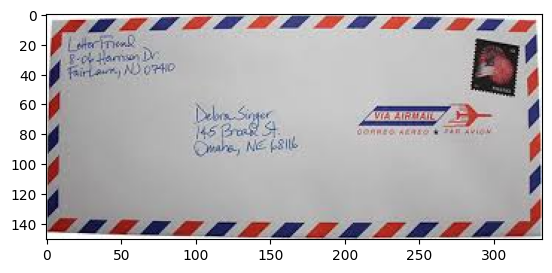

In [14]:
plt.imshow(img_r)

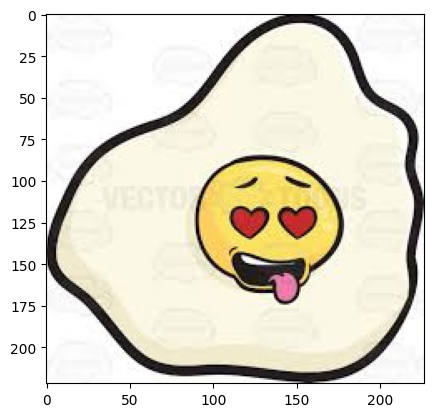

In [15]:
plt.imshow(img_o)

## ImageDataGenerator

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
train_data_generator = ImageDataGenerator (rescale = 1/255.0)

In [18]:
test_data_generator = ImageDataGenerator (rescale = 1/255.0)

In [19]:
train_generator = train_data_generator.flow_from_directory(
    directory = train_dir,
    target_size = (224,224),
    batch_size = 32,
    class_mode = "binary"
)

test_generator = test_data_generator.flow_from_directory(
    directory = test_dir,
    target_size = (224,224),
    batch_size = 32,
    class_mode = "binary"
)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [20]:
batch_images, batch_labels = next(iter(train_generator))

In [21]:
batch_images.shape

(32, 224, 224, 3)

In [22]:
batch_labels

array([1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1.,
       1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

In [23]:
train_generator.class_indices

{'O': 0, 'R': 1}

In [24]:
batch_images[2].shape

(224, 224, 3)

## Modeling

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [26]:
model = Sequential([

    #Extraction de caractéristiques
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation='relu', input_shape=(224, 224,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    # applatir
    tf.keras.layers.Flatten(),

    # Dense
    tf.keras.layers.Dense(units=128, activation="relu"),
    tf.keras.layers.Dense(units=1, activation="sigmoid"),
                ])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 55, 55, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 53, 53, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [28]:
model_ckp = tf.keras.callbacks.ModelCheckpoint(filepath="best_model.h5",
                            monitor="val_accuracy",
                            mode="max",
                            save_best_only=True)
stop = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=3)


In [29]:
model.compile(optimizer= tf.keras.optimizers.RMSprop(learning_rate=0.001),
              loss="binary_crossentropy",
              metrics=['accuracy'])

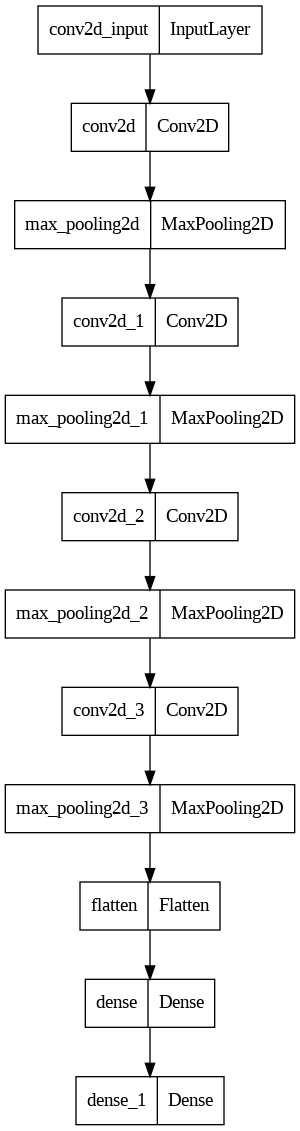

In [31]:
tf.keras.utils.plot_model(model)

In [32]:
h= model.fit(train_generator, epochs=50,
             validation_data=(test_generator),
             callbacks = [model_ckp, stop])

Epoch 1/50
706/706 [==============================] - 50s 71ms/step - loss: 0.4249 - accuracy: 0.8196 - val_loss: 0.3088 - val_accuracy: 0.8977


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/50
706/706 [==============================] - 51s 72ms/step - loss: 0.3739 - accuracy: 0.8435 - val_loss: 0.3267 - val_accuracy: 0.8703
Epoch 3/50
706/706 [==============================] - 56s 79ms/step - loss: 0.3418 - accuracy: 0.8586 - val_loss: 0.3445 - val_accuracy: 0.8587
Epoch 4/50
706/706 [==============================] - 56s 80ms/step - loss: 0.3175 - accuracy: 0.8713 - val_loss: 0.2489 - val_accuracy: 0.9049
Epoch 5/50
706/706 [==============================] - 52s 73ms/step - loss: 0.2963 - accuracy: 0.8820 - val_loss: 0.4326 - val_accuracy: 0.8619
Epoch 6/50
706/706 [==============================] - 53s 74ms/step - loss: 0.2755 - accuracy: 0.8894 - val_loss: 0.2689 - val_accuracy: 0.8997
Epoch 7/50
706/706 [==============================] - 54s 77ms/step - loss: 0.2498 - accuracy: 0.9011 - val_loss: 0.3831 - val_accuracy: 0.8707
